943 1682 8
Training RMSE: 1.122843, Test RMSE 1.131517
Training RMSE: 1.121081, Test RMSE 1.131397
Training RMSE: 1.118437, Test RMSE 1.130577
Training RMSE: 1.112118, Test RMSE 1.127019
Training RMSE: 1.094666, Test RMSE 1.114674
Training RMSE: 1.059539, Test RMSE 1.088563
Training RMSE: 1.020118, Test RMSE 1.060537
Training RMSE: 0.983718, Test RMSE 1.036479
Training RMSE: 0.949809, Test RMSE 1.014471
Training RMSE: 0.922491, Test RMSE 0.996904
Training RMSE: 0.901416, Test RMSE 0.983795
Training RMSE: 0.884758, Test RMSE 0.974160
Training RMSE: 0.871156, Test RMSE 0.967228
Training RMSE: 0.859294, Test RMSE 0.961792
Training RMSE: 0.849225, Test RMSE 0.957308
Training RMSE: 0.840273, Test RMSE 0.954257
Training RMSE: 0.832198, Test RMSE 0.951807
Training RMSE: 0.824736, Test RMSE 0.949735
Training RMSE: 0.818208, Test RMSE 0.948524
Training RMSE: 0.812592, Test RMSE 0.947764


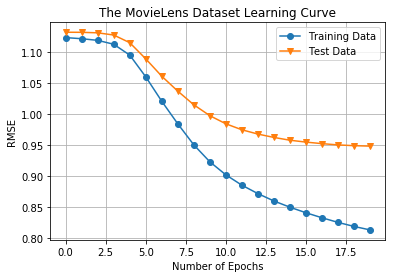

precision_acc,recall_acc:(0.05615711252653957, 0.0322092749781848)


In [5]:
import matplotlib.pyplot as plt
import numpy as np
from LoadData import load_rating_data, spilt_rating_dat
from sklearn.model_selection import train_test_split
from ProbabilisticMatrixFactorization import PMF

if __name__ == "__main__":
    file_path = "data/ml-100k/u.data"
    pmf = PMF()
    pmf.set_params({"num_feat": 8, "epsilon": 1, "_lambda": 0.1, "momentum": 0.8, "maxepoch": 20, "num_batches": 100,
                    "batch_size": 1000})
    ratings = load_rating_data(file_path)
    print(len(np.unique(ratings[:, 0])), len(np.unique(ratings[:, 1])), pmf.num_feat)
    train, test = train_test_split(ratings, test_size=0.2)  # spilt_rating_dat(ratings)
    pmf.fit(train, test)


    # Check performance by plotting train and test errors
    plt.plot(range(pmf.maxepoch), pmf.rmse_train, marker='o', label='Training Data')
    plt.plot(range(pmf.maxepoch), pmf.rmse_test, marker='v', label='Test Data')
    plt.title('The MovieLens Dataset Learning Curve')
    plt.xlabel('Number of Epochs')
    plt.ylabel('RMSE')
    plt.legend()
    plt.grid()
    plt.show()
    print("precision_acc,recall_acc:" + str(pmf.topK(test)))

In [6]:
np.save('./item_embed',pmf.w_Item)
np.save('./user_embed',pmf.w_User)